In [5]:
from ipynb.fs.full.AppProcessing import *
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import numpy as np

To investigate irregularities in the signal first plot the trace of an App recording (internal reference, 50 mV , 5 Hz, Experiment 25 (24.08) on Git).


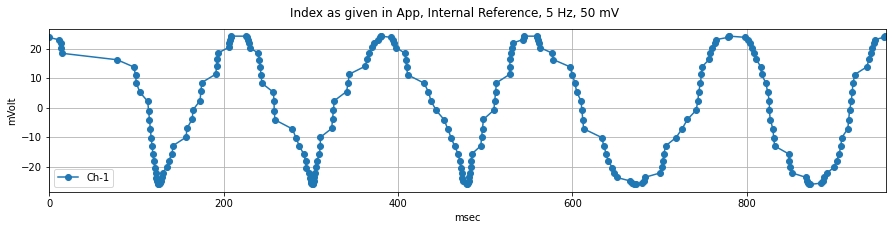

In [6]:
normal = tidyAppOutput(pd.read_csv("24-08-2020_13-02-03_exp25.csv"), evenlyIndex=False)
plotTraceApp(normal, channelname=["Ch-1"], fro= 0, to = 1000, title = "Index as given in App, Internal Reference, 5 Hz, 50 mV")

As one can see, the shape only roughly resembles the actual imput (Sinus, 5 Hz, 50mV peak-to-peak).

Therefore, the "tidyAppOutput" function has been changed to evenly distribute the measured according to the sampling rate (250Hz at the moment) (Note, function should be changed to adapt for evental changed in the sampling frequency).

The following shows the signal with evenly distributed timestamps. The signal is smoother but some jumps remain.

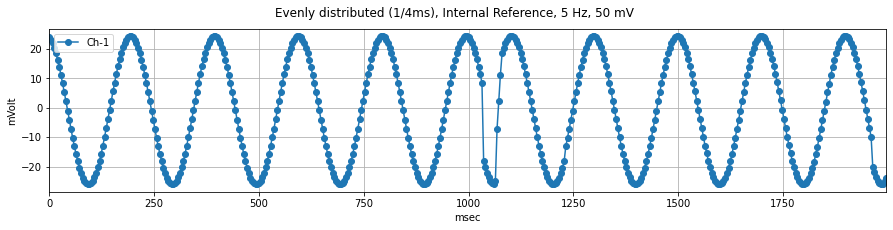

In [7]:
plotTraceApp(evenly, channelname=["Ch-1"], fro= 0, to = 2000, title = "Evenly distributed (1/4ms), Internal Reference, 5 Hz, 50 mV")#, save = True, saveas= "EvenlyDistributed")

To further understand the signal, the timestamps are futher investigated. This includes the number of samples per second as well as their timestamps and whether there are dublicates.

In [15]:
normal = tidyAppOutput(file, evenlyIndex= False)

normal_index_list = normal.index[:].tolist()
# Find duplicates
duplicates = [x for n, x in enumerate(normal_index_list) if x in normal_index_list[:n]]
print("Duplicates in the timestamp without even distribution: {}\n".format(len(duplicates)), duplicates)


# Samples in approx. one second
oneSec = normal.loc[0.0:1001.0]
print("Number of Elements between 0 and 1001 msecs: ", len(oneSec.index))





Duplicates in the timestamp without even distribution: 95
 [125.0, 206.0, 258.0, 300.0, 304.0, 311.0, 479.0, 484.0, 528.0, 780.0, 826.0, 1641.0, 1642.0, 1660.0, 1675.0, 1678.0, 1679.0, 1692.0, 1694.0, 1725.0, 1727.0, 1742.0, 1744.0, 1745.0, 1747.0, 1759.0, 1760.0, 1761.0, 1763.0, 1776.0, 1777.0, 1778.0, 1779.0, 1780.0, 1780.0, 1781.0, 1782.0, 1783.0, 1784.0, 1809.0, 1809.0, 1810.0, 1811.0, 1826.0, 1827.0, 1848.0, 3019.0, 3114.0, 3147.0, 3149.0, 3163.0, 3177.0, 3178.0, 3193.0, 3194.0, 3195.0, 3215.0, 3246.0, 3247.0, 3277.0, 3583.0, 3640.0, 3771.0, 3786.0, 4089.0, 4395.0, 4599.0, 4602.0, 4641.0, 4707.0, 4714.0, 4781.0, 4786.0, 4833.0, 4892.0, 5085.0, 5104.0, 5158.0, 5464.0, 5469.0, 5474.0, 5650.0, 5815.0, 5923.0, 5965.0, 6083.0, 6099.0, 6100.0, 7122.0, 7138.0, 7185.0, 7216.0, 7300.0, 7789.0, 7841.0]
Number of Elements between 0 and 1001 msecs:  254
